In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [24]:
 data = pd.read_csv("/content/Boston.csv")

In [25]:
print(data.head())

   Unnamed: 0     crim    zn  indus  chas    nox     rm   age     dis  rad  \
0           1  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1   
1           2  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2   
2           3  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2   
3           4  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3   
4           5  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3   

   tax  ptratio   black  lstat  medv  
0  296     15.3  396.90   4.98  24.0  
1  242     17.8  396.90   9.14  21.6  
2  242     17.8  392.83   4.03  34.7  
3  222     18.7  394.63   2.94  33.4  
4  222     18.7  396.90   5.33  36.2  


In [26]:
print("Dataset Shape:", data.shape)
print("Feature Names:", data.columns.tolist())

Dataset Shape: (506, 15)
Feature Names: ['Unnamed: 0', 'crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'black', 'lstat', 'medv']


In [27]:
 data.rename(columns={'MEDV': 'Price'}, inplace=True)
 print("Dataset Description:\n", data.describe())

Dataset Description:
        Unnamed: 0        crim          zn       indus        chas         nox  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean   253.500000    3.613524   11.363636   11.136779    0.069170    0.554695   
std    146.213884    8.601545   23.322453    6.860353    0.253994    0.115878   
min      1.000000    0.006320    0.000000    0.460000    0.000000    0.385000   
25%    127.250000    0.082045    0.000000    5.190000    0.000000    0.449000   
50%    253.500000    0.256510    0.000000    9.690000    0.000000    0.538000   
75%    379.750000    3.677083   12.500000   18.100000    0.000000    0.624000   
max    506.000000   88.976200  100.000000   27.740000    1.000000    0.871000   

               rm         age         dis         rad         tax     ptratio  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     6.284634   68.574901    3.795043    9.549407  408.237154   18.455534   
std  

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   crim        506 non-null    float64
 2   zn          506 non-null    float64
 3   indus       506 non-null    float64
 4   chas        506 non-null    int64  
 5   nox         506 non-null    float64
 6   rm          506 non-null    float64
 7   age         506 non-null    float64
 8   dis         506 non-null    float64
 9   rad         506 non-null    int64  
 10  tax         506 non-null    int64  
 11  ptratio     506 non-null    float64
 12  black       506 non-null    float64
 13  lstat       506 non-null    float64
 14  medv        506 non-null    float64
dtypes: float64(11), int64(4)
memory usage: 59.4 KB


In [29]:
 print("Columns in the dataset:", data.columns)

Columns in the dataset: Index(['Unnamed: 0', 'crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis',
       'rad', 'tax', 'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')


In [30]:
target_column_name = 'target_column_name'

In [37]:
!pip install scikit-learn
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Assuming the column name is actually 'medv' or similar instead of 'Price'
target_column_name = 'medv'  # Change to the actual column name

# Separate features (X) and target (y)
X = data.drop(columns=[target_column_name])  # Drop the target column
y = data[target_column_name]  # Target variable

# Now, SimpleImputer, train_test_split and LinearRegression should work
# ... (rest of your code) ...
X = data.drop(columns=[target_column_name])  # Drop the target column
y = data[target_column_name]

# Now, SimpleImputer, train_test_split and LinearRegression will work
imputer = SimpleImputer(strategy='mean')  # You can also use 'median' or 'most_frequent' depending on the dataset
X = imputer.fit_transform(X)
y = imputer.fit_transform(y.values.reshape(-1, 1)).flatten()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [41]:
from sklearn.metrics import mean_squared_error # Import mean_squared_error
y_pred = regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred) # Now mean_squared_error is defined
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 24.497819777630216


In [42]:
 print("Model coefficients:", regressor.coef_)
 print("Model intercept:", regressor.intercept_)

Model coefficients: [-3.47490827e-03 -1.13313604e-01  3.23067056e-02  4.35516844e-02
  2.75621916e+00 -1.69386529e+01  4.48663161e+00 -1.09175430e-02
 -1.47608119e+00  2.92666304e-01 -9.92202267e-03 -9.11544575e-01
  1.24202332e-02 -5.12262693e-01]
Model intercept: 30.412686521180103


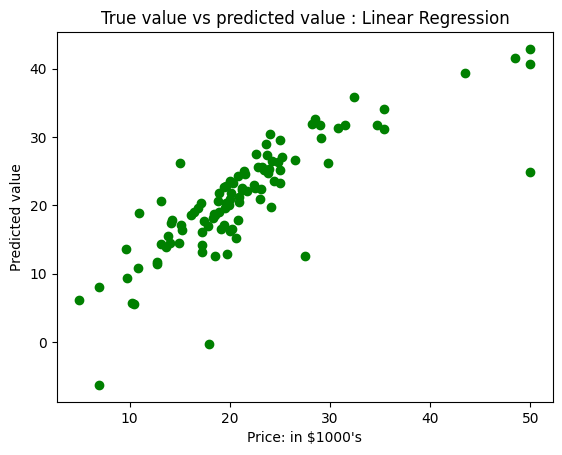

In [43]:
 plt.scatter(y_test, y_pred, c='green')
 plt.xlabel("Price: in $1000's")
 plt.ylabel("Predicted value")
 plt.title("True value vs predicted value : Linear Regression")
 plt.show()